In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel("Dataset_Quitosana_Adsorcao.xlsx") # lê o arquivo excel 

df = df.drop(['Unnamed: 6', "Artigos", "Experimento"], axis=1) # remove colunas desnecessárias

# df = pd.get_dummies(df, columns=['Modificação'], dtype=int) # Transforma a coluna "Modificação" (categorica) em colunas numéricas

conversion = {
    "Sim": 0,
    "Não": 1
}

df["Modificação_num"] = df["Modificação"].map(conversion) 


In [3]:
df.describe()

,Concentração Inicial (mg/L),Dose de adsorvente (g/L),pH,Remoção (%),Modificação_num
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,33.428571,3.701589,5.154762,66.724643,0.297619
std,32.863640,4.441654,1.602723,26.427482,0.458578
min,0.250000,0.050000,1.500000,0.000000,0.000000
25%,1.500000,1.000000,4.000000,44.072500,0.000000
50%,20.000000,3.000000,6.000000,71.585000,0.000000
75%,60.000000,5.000000,6.000000,92.200000,1.000000
max,100.000000,24.200000,9.500000,100.000000,1.000000


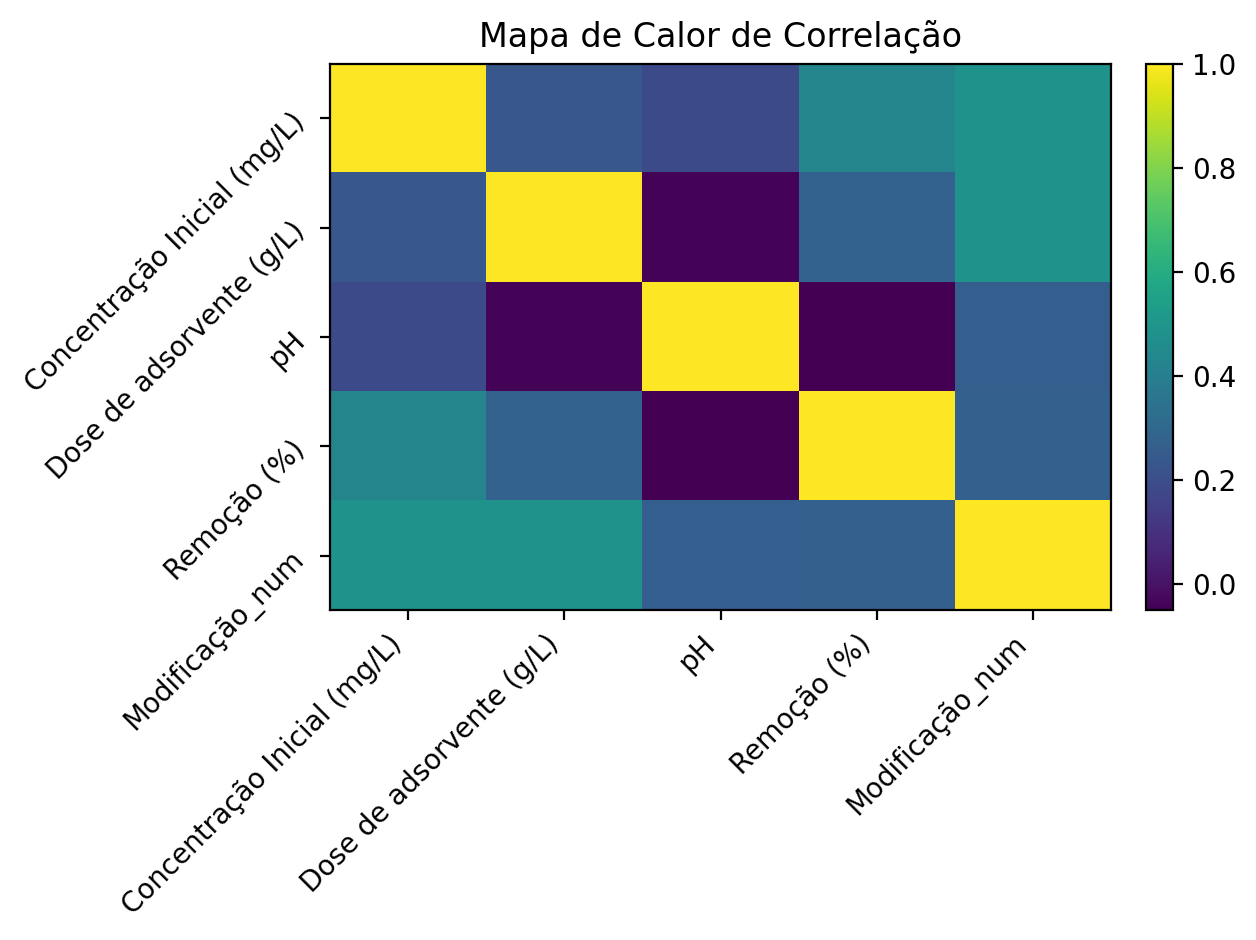

,Concentração Inicial (mg/L),Dose de adsorvente (g/L),pH,Remoção (%),Modificação_num
Concentração Inicial (mg/L),1.000000,0.235641,0.185520,0.426568,0.488152
Dose de adsorvente (g/L),0.235641,1.000000,-0.038167,0.280017,0.484842
pH,0.185520,-0.038167,1.000000,-0.050470,0.262846
Remoção (%),0.426568,0.280017,-0.050470,1.000000,0.271749
Modificação_num,0.488152,0.484842,0.262846,0.271749,1.000000


In [4]:
# Matriz de correlação 

num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)

plt.figure(dpi=200)
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.title('Mapa de Calor de Correlação')
plt.tight_layout()
plt.show()

display(corr)

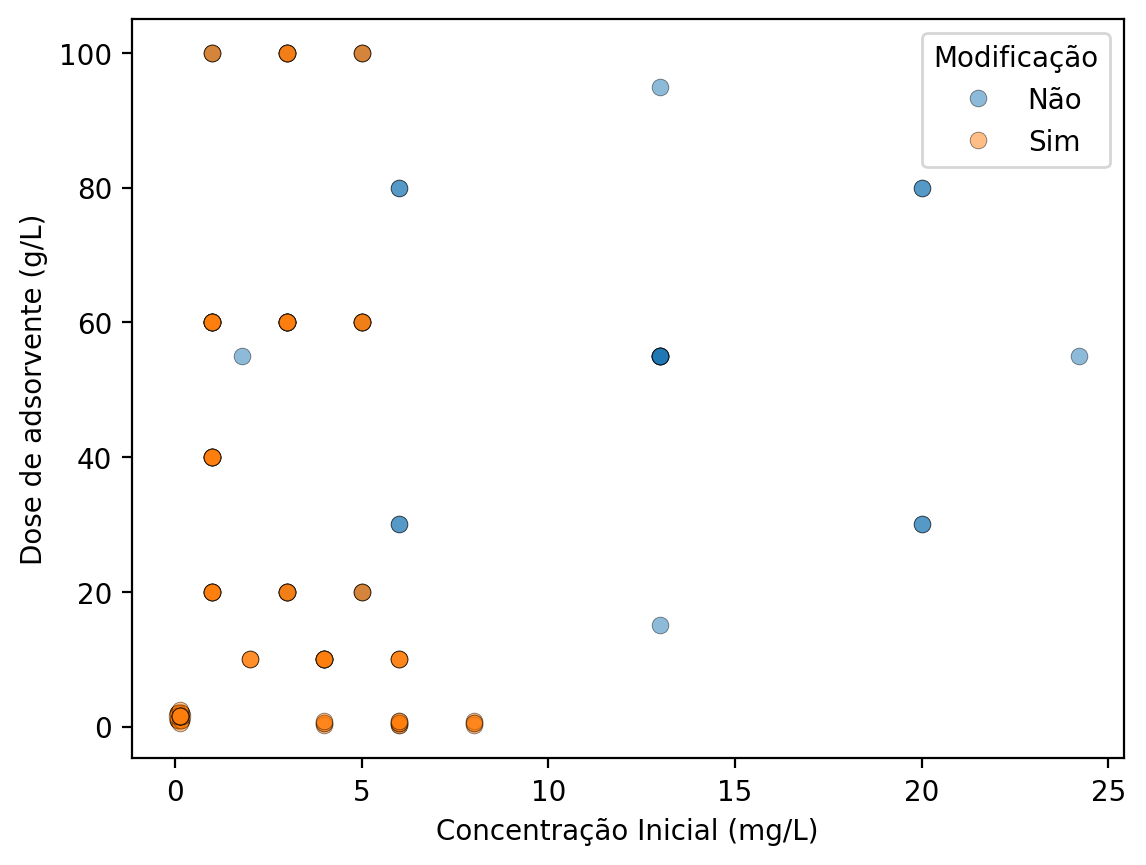

In [5]:
plt.figure(dpi=200)
for proc in df['Modificação'].dropna().unique():
    mask = df['Modificação'] == proc
    plt.plot(
        df.loc[mask, 'Dose de adsorvente (g/L)'],
        df.loc[mask, 'Concentração Inicial (mg/L)'],
        marker='o', mec='k', mew=0.3, linestyle='None', label=str(proc), alpha=0.5
    )

plt.ylabel('Dose de adsorvente (g/L)')
plt.xlabel('Concentração Inicial (mg/L)')
plt.legend(title='Modificação')
plt.show()

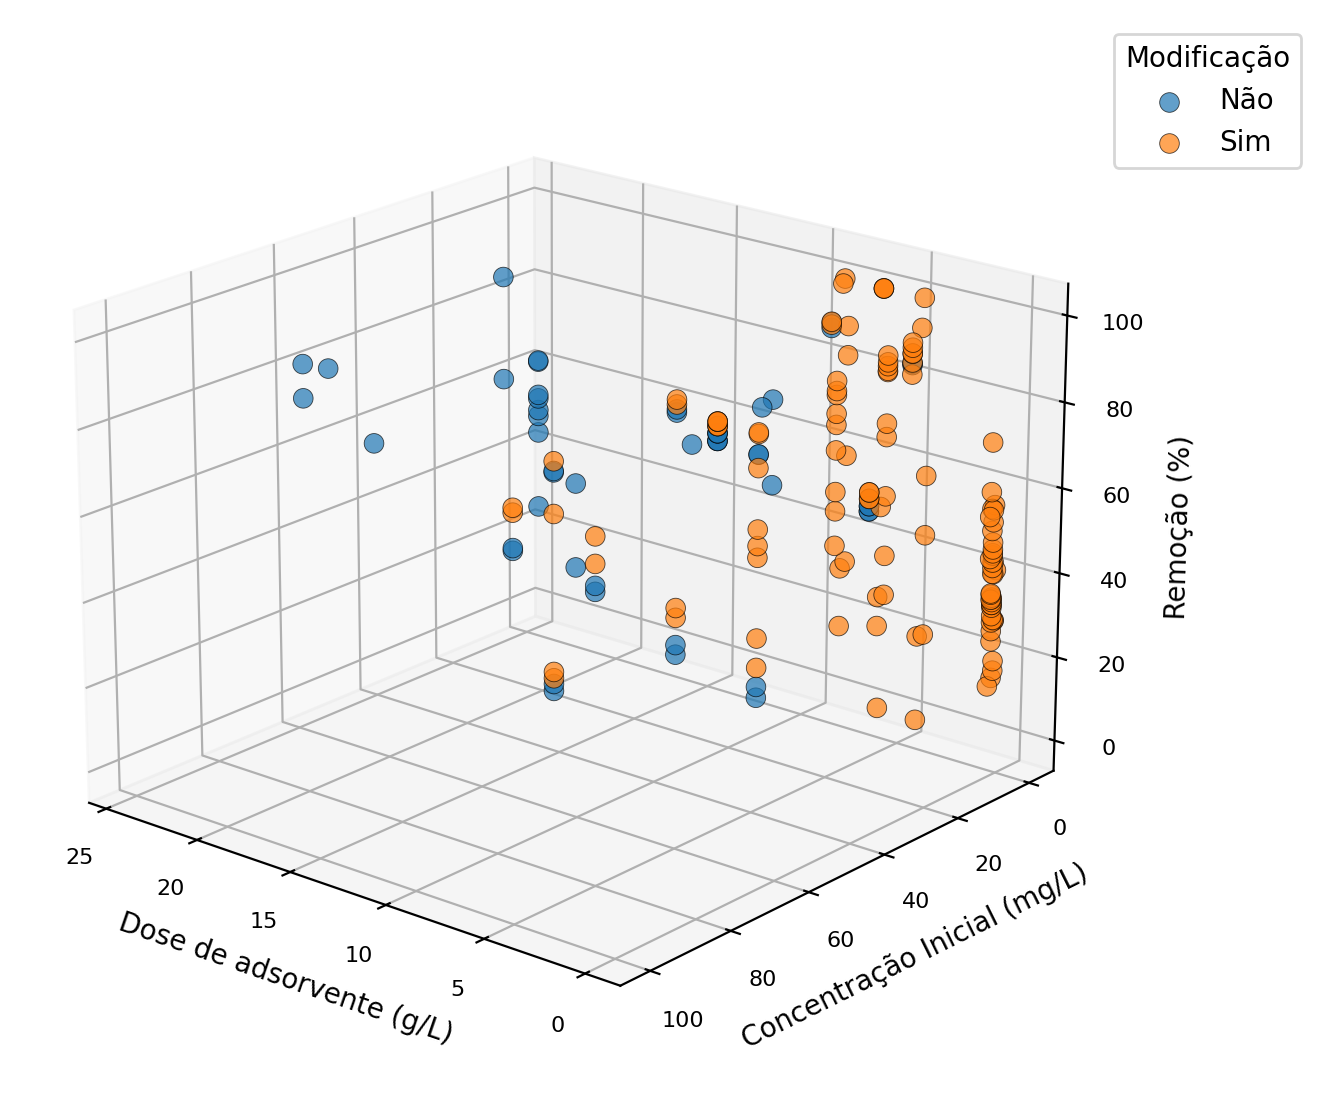

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(10, 6), dpi=200)
ax = fig.add_subplot(111, projection='3d')

for proc in df['Modificação'].dropna().unique():
    mask = df['Modificação'] == proc
    ax.scatter(
        df.loc[mask, 'Dose de adsorvente (g/L)'],
        df.loc[mask, 'Concentração Inicial (mg/L)'],
        df.loc[mask, 'Remoção (%)'],
        label=str(proc),
        s=50,
        marker='o',
        edgecolors='k',  # substitui mec='k'
        linewidths=0.3,  # substitui mew=0.3
        alpha=0.7
    )

ax.set_xlabel('Dose de adsorvente (g/L)')
ax.set_ylabel('Concentração Inicial (mg/L)')
ax.set_zlabel('Remoção (%)')

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='z', labelsize=8)


ax.legend(title='Modificação', loc='upper left', bbox_to_anchor=(1.0, 1))
ax.view_init(elev=20, azim=130)

plt.subplots_adjust(left=0.05, right=0.75, bottom=0.05, top=0.95)
plt.show()



Index(['Não', 'Sim'], dtype='object', name='Modificação')


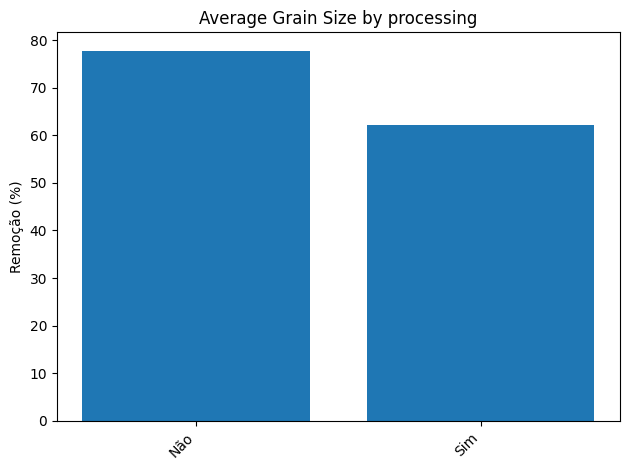

In [7]:
remocao = df.groupby('Modificação', dropna=False)['Remoção (%)'].mean()
remocao_std = remocao.std()
cats = remocao.index.astype(str)
print(cats)
vals = remocao.values

plt.figure()
plt.bar(cats, vals)
plt.xticks(cats, rotation=45, ha='right')
plt.ylabel('Remoção (%)')
plt.title('Average Grain Size by processing')
plt.tight_layout()
plt.show()